## Analysis
    -Of all the drugs, Capomulin and Ramincane had much lower average tumor volumes when compared to the other drugs regimens
    -These two drugs also recorded the most timepoints, suggesting that the mice lived longer when treated with these drugs
    -There is a strong positive correlation between mouse weight and average tumor volume (corr coeff = .84)
    

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook


In [2]:
#set file paths and read in files
mouse_path = 'Pymaceuticals/data/Mouse_metadata.csv'
study_path = 'Pymaceuticals/data/Study_results.csv'
mouse_data = pd.read_csv(mouse_path)
study_data = pd.read_csv(study_path)

## Data Preparation

In [3]:
#merge the two datasets into a single dataset
merged_data = pd.merge(mouse_data,study_data,on='Mouse ID')
#show total number of mic
len(merged_data['Mouse ID'].unique())


249

In [4]:
#find any duplicate mice
duplicates = merged_data[merged_data.duplicated(['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#create new dataframe without duplicate mouse
cleaned_data = merged_data.loc[(merged_data['Mouse ID'] !='g989'),:]

In [6]:
#find new number of unique mice
len(cleaned_data['Mouse ID'].unique())

248

## Summary statistics

In [7]:
#calculate tumor volume summary statistics of each drug
mean = cleaned_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = cleaned_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
stand = cleaned_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
variance = cleaned_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
sem = cleaned_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
summary = pd.DataFrame({'Mean':mean,'Median':median,'St Dev':stand,'Variance':variance,"Standard Error":sem})
summary

,Mean,Median,St Dev,Variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

In [8]:
#find total number of timepoints by Drug Regimin 
regimen = cleaned_data.groupby(['Drug Regimen']).count()['Timepoint']


<IPython.core.display.Javascript object>


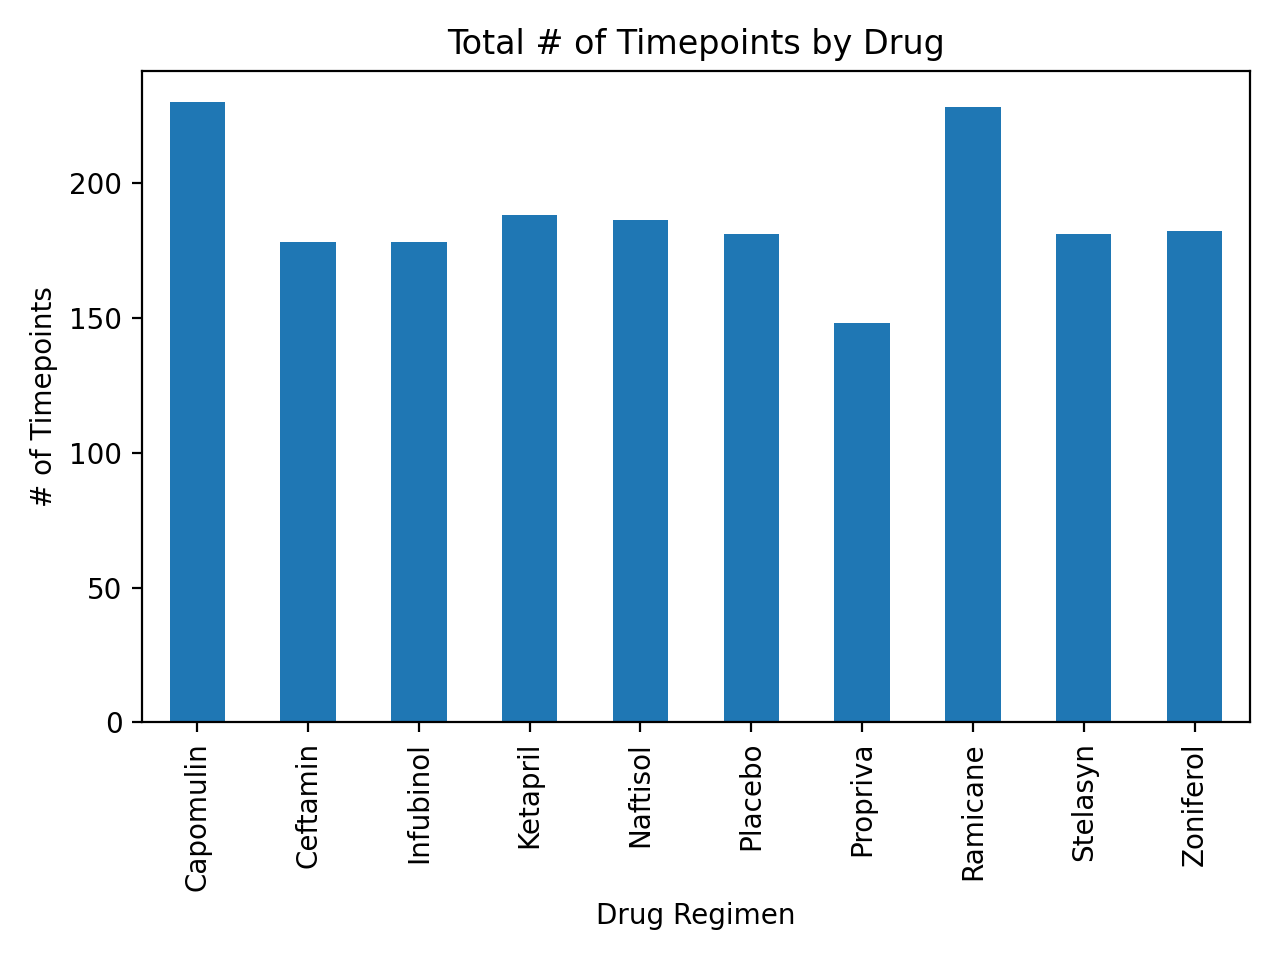

In [11]:
#plot the timepoints using pyplot
regimen.plot(kind='bar',title='Total # of Timepoints by Drug',ylabel='# of Timepoints',legend=False)
plt.tight_layout()
plt.show()

In [12]:
# convert series into a dataframe
regimen = pd.DataFrame(regimen)


<IPython.core.display.Javascript object>


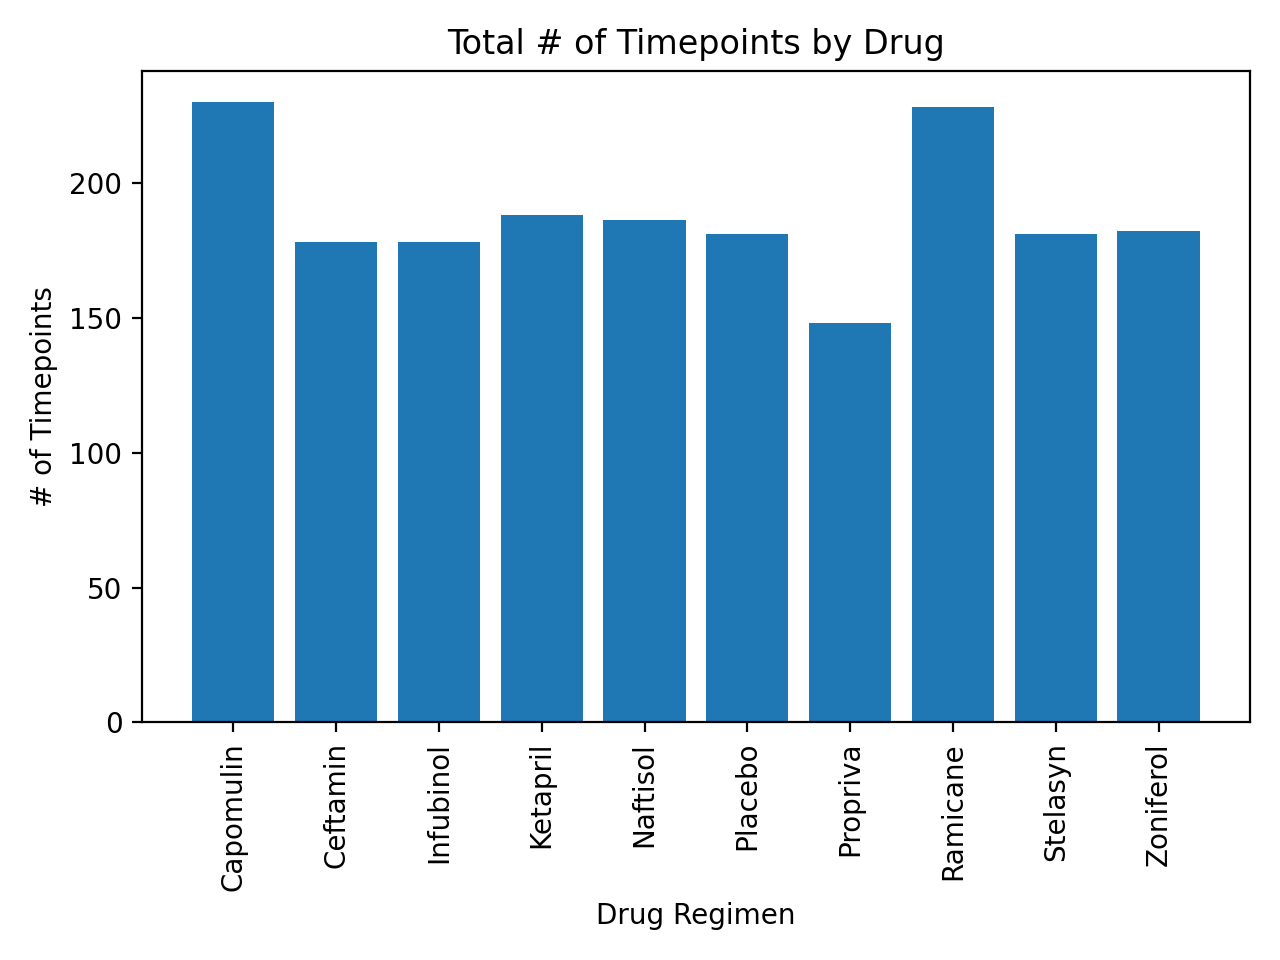

In [13]:
#plot timepoints by drug using pandas 
x_axis = regimen.index
y_axis = regimen['Timepoint']


plt.bar(x_axis,y_axis)
tick_locations = np.arange(0,len(regimen),1)
plt.xticks(tick_locations,x_axis,rotation=90)
plt.title('Total # of Timepoints by Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.tight_layout()




In [14]:
#Define variables for male and female mice
males = len(cleaned_data.loc[(cleaned_data['Sex']=='Male')])
females = len(cleaned_data.loc[(cleaned_data['Sex']=='Female')])
gender_counts = [males,females]
gender = ['Males','Females']

<IPython.core.display.Javascript object>


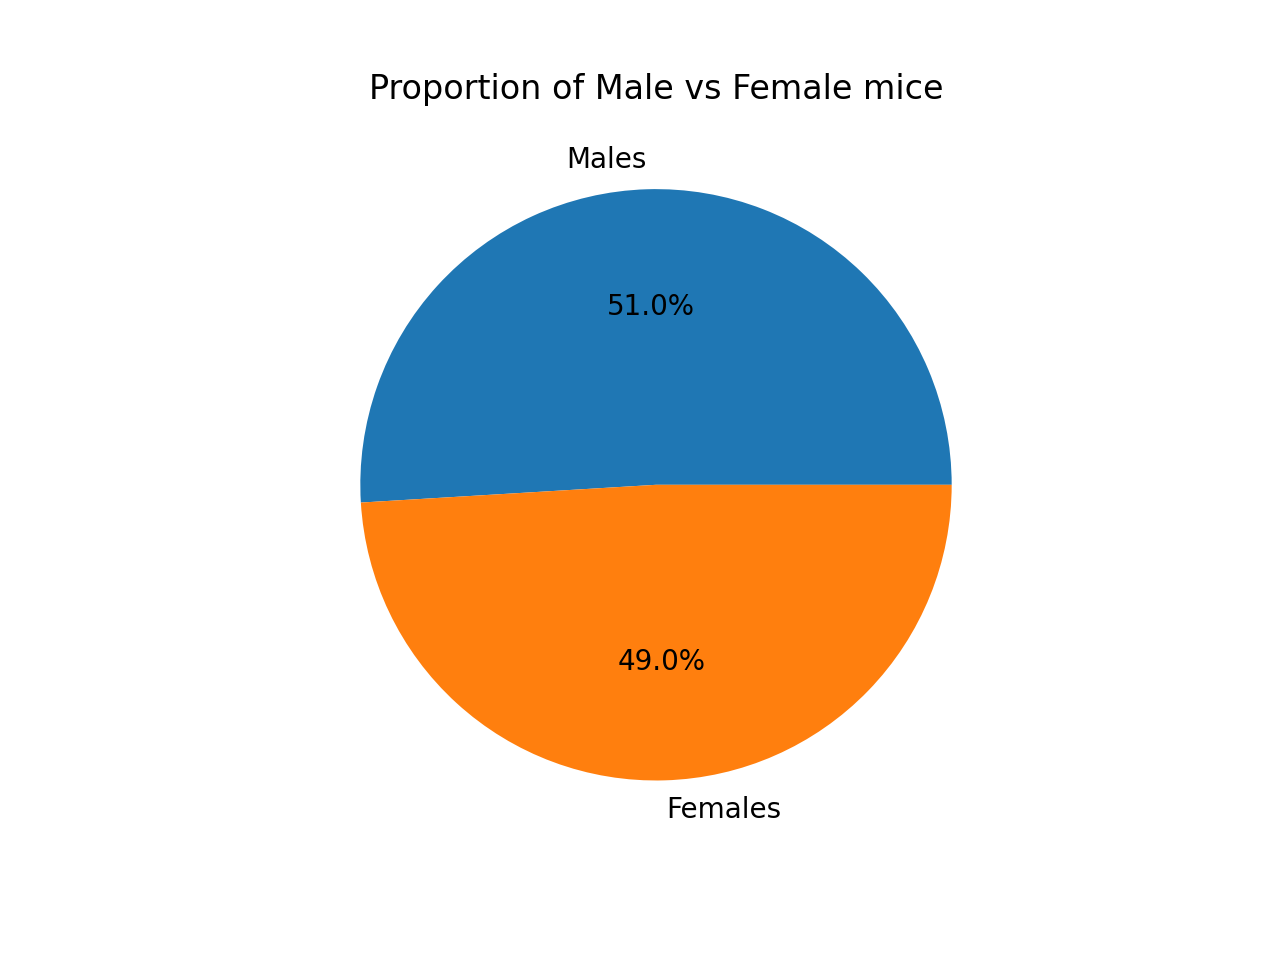

In [15]:
#plot genders in a pie plot using pyplot
plt.pie(gender_counts,labels = gender,autopct='%1.1f%%')
plt.title('Proportion of Male vs Female mice')
plt.show()

<IPython.core.display.Javascript object>


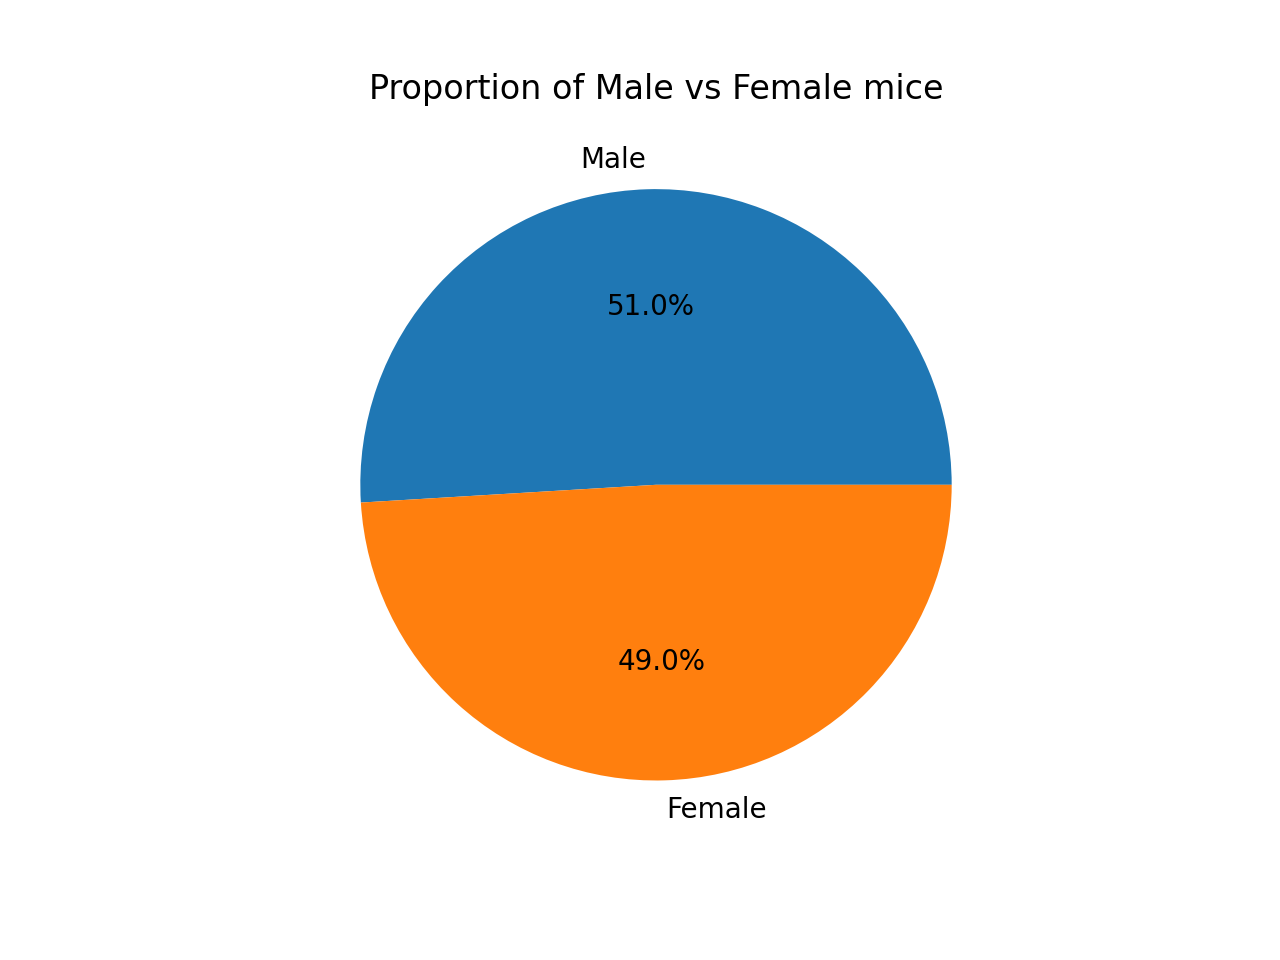

In [16]:
#plot gender summary on a pie chart using pandas
gender_summary = cleaned_data.value_counts('Sex').head(30)
gender_summary.plot(kind='pie',title = 'Proportion of Male vs Female mice',autopct='%1.1f%%',ylabel='')
plt.show()

## Quartiles and Boxplots

In [17]:
#find the last timepoint for each mouse and store in dataframe
tumor_volume = cleaned_data.groupby(['Mouse ID']).max('Timepoint')

tumor_volume = tumor_volume [['Timepoint']]
tumor_volume.reset_index()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [18]:
#create a new dataframe off original dataframe, with only columns we need
drugs = cleaned_data[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Weight (g)']]

#merge tumor volume and new dataframe with selected columns
volume_by_drugs = pd.merge(tumor_volume,drugs,on=['Mouse ID'])
volume_by_drugs
#remove duplicate mice, keeping only the last instance to ensure we have the final Tumor volume
volume_by_drugs = volume_by_drugs.drop_duplicates(['Mouse ID','Drug Regimen'],keep='last')


In [19]:
#create a list for treatments and an empty list for volumes
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
volumes = [] 


In [20]:
#loop through the treatments, appending volumes to the empty list
for x in treatments:
    volumes.append(volume_by_drugs.loc[(volume_by_drugs['Drug Regimen']==x),'Tumor Volume (mm3)'])


In [21]:
#FIND INTERQUARTILE RANGES for each drug and print each
cap_quartiles = volumes[0].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

for y in volumes[0]:
    if y > cap_upper_bound or y < cap_lower_bound:
        print(f"Outliers for Capomulin are {y}")
 

In [22]:

Ram_quartiles = volumes[1].quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq
Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)

for z in volumes[1]:
    if z > Ram_upper_bound or z < Ram_lower_bound:
        print(f"Outliers for Ramicane are {z}")

In [24]:
Inf_quartiles = volumes[2].quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq
Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)

for a in volumes[2]:
    if a > Inf_upper_bound or a < Inf_lower_bound:
        print(f"Outliers for Infubinol are {a}")
   

Outliers for Infubinol are 36.3213458


In [23]:
Cef_quartiles = volumes[3].quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq
Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)

for b in volumes[3]:
    if b > Cef_upper_bound or b < Cef_lower_bound:
        print(f"Outliers for Ceftamin are {b}")

<IPython.core.display.Javascript object>


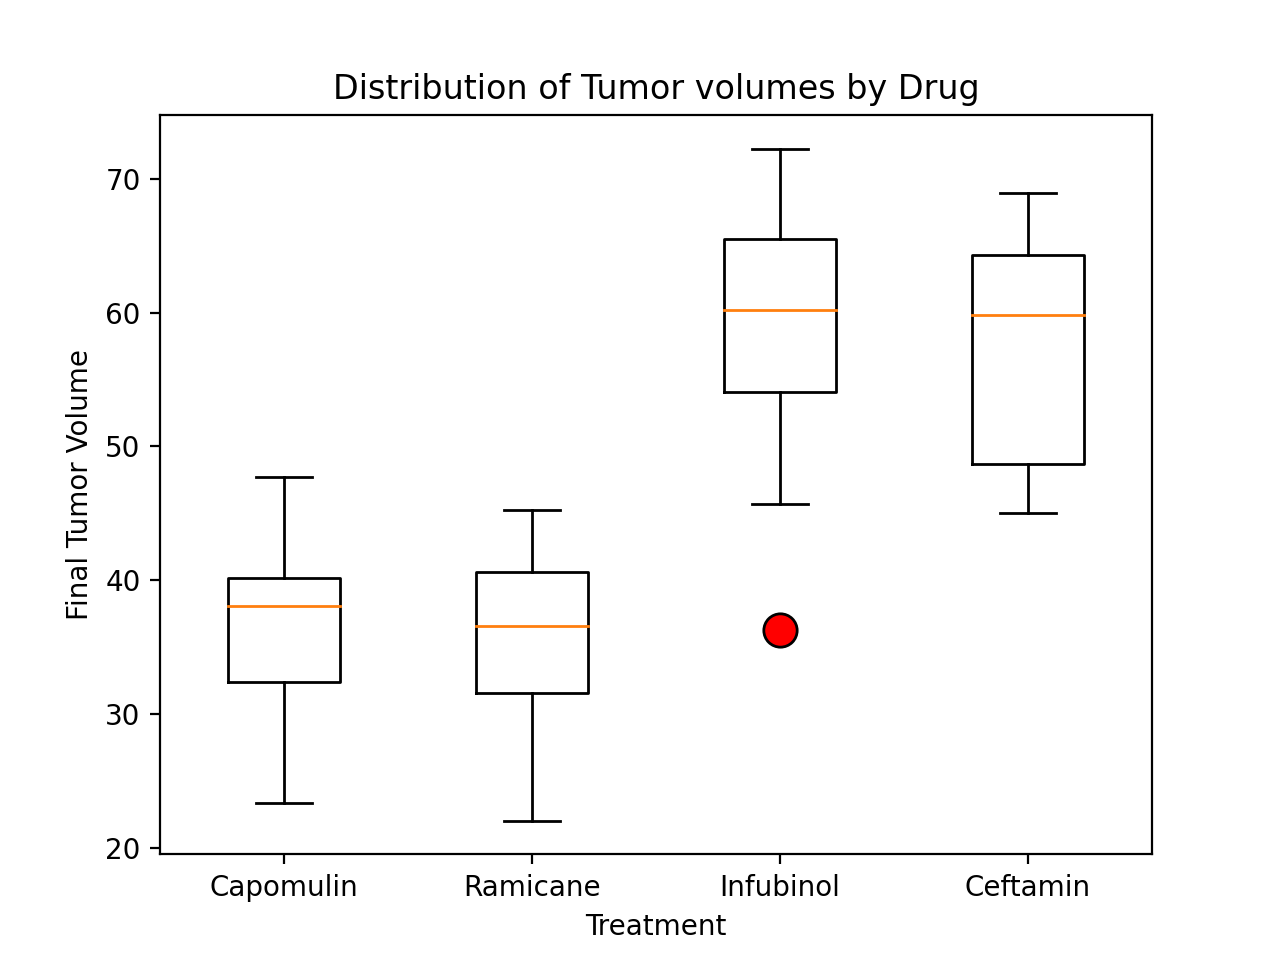

In [26]:
#create boxplot for distributon of tumors by drug

plt.title('Distribution of Tumor volumes by Drug')
plt.ylabel('Final Tumor Volume')
plt.xlabel('Treatment')
flierprops = dict(markerfacecolor ='r',markersize=12)
plt.boxplot(volumes,labels=treatments,flierprops=flierprops)
plt.show()

<IPython.core.display.Javascript object>


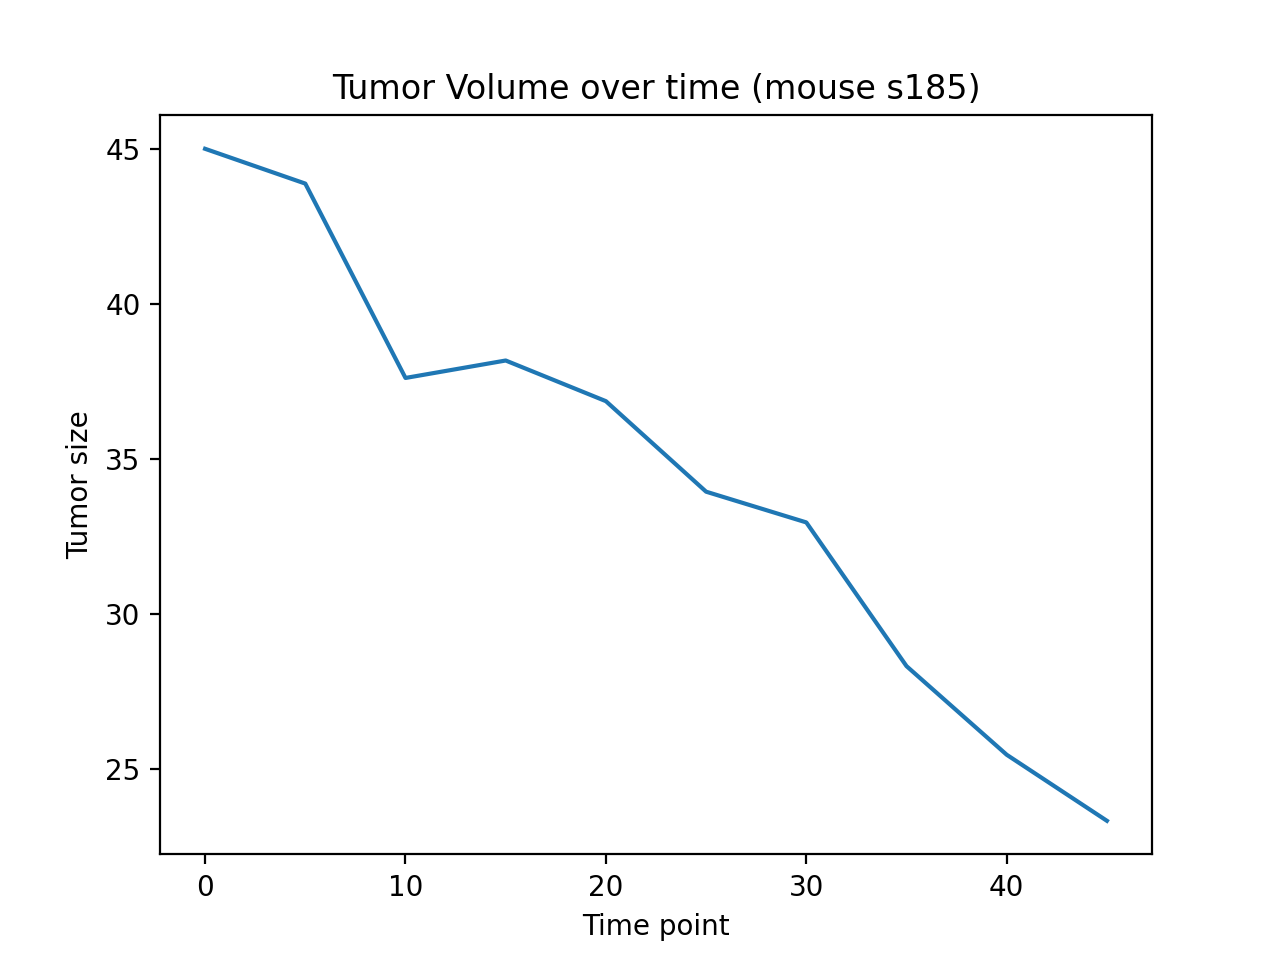

In [28]:
#create a line plot of tumor volume over time for a single mouse
mouseid = 's185'
mouse_plot = cleaned_data.loc[(cleaned_data['Mouse ID'] == mouseid),:]
xaxis = mouse_plot['Timepoint']
yaxis = mouse_plot['Tumor Volume (mm3)']
plt.title(f"Tumor Volume over time (mouse {mouseid})")
plt.xlabel('Time point')
plt.ylabel('Tumor size')
plt.plot(xaxis,yaxis)
plt.show()

In [29]:
#find the average tumor volume for capomulin
cap_volumes = cleaned_data.loc[(cleaned_data['Drug Regimen']=='Capomulin'),:]
avg_volume = cap_volumes.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

In [30]:
#create new dataframe that filters by Capomulin
scatter = volume_by_drugs.loc[(volume_by_drugs['Drug Regimen']=='Capomulin'),:]


<IPython.core.display.Javascript object>


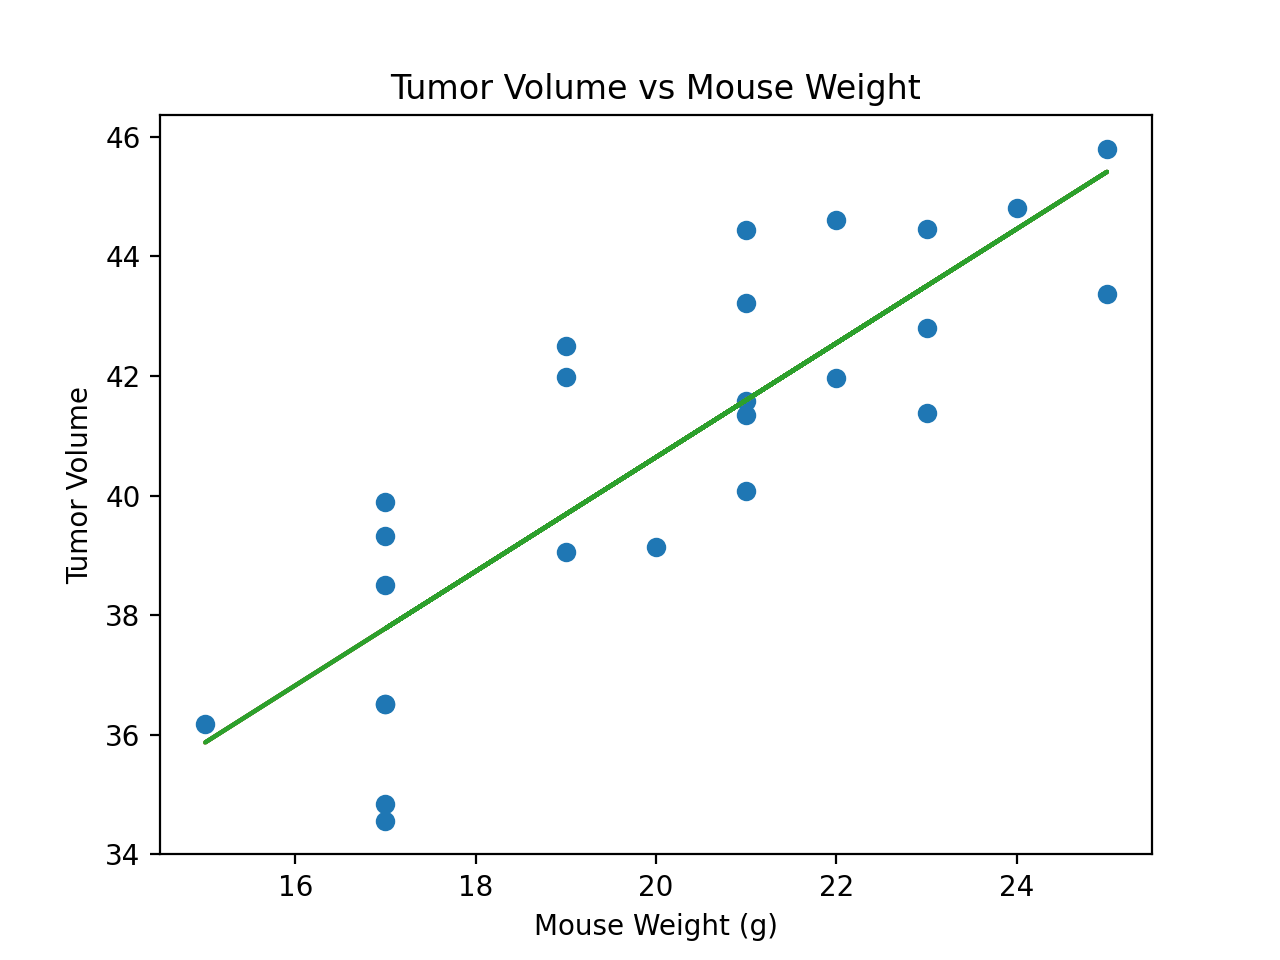

In [31]:
#make scatter plot for tumor volume vs mouse weight
xaxis2 = scatter['Weight (g)']
yaxis2 = avg_volume
plt.scatter(xaxis2, yaxis2)
plt.title('Tumor Volume vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()

In [35]:
#run linear regression on scatter values
slope,intercept,rvalue,pvalue,std=st.linregress(xaxis2,yaxis2)
yvalues = slope * xaxis2 + intercept
correlation = st.pearsonr(xaxis2,yaxis2)
print(correlation)

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


In [36]:
#plot line over scatter plot
plt.plot(xaxis2,yvalues)
plt.show()